c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


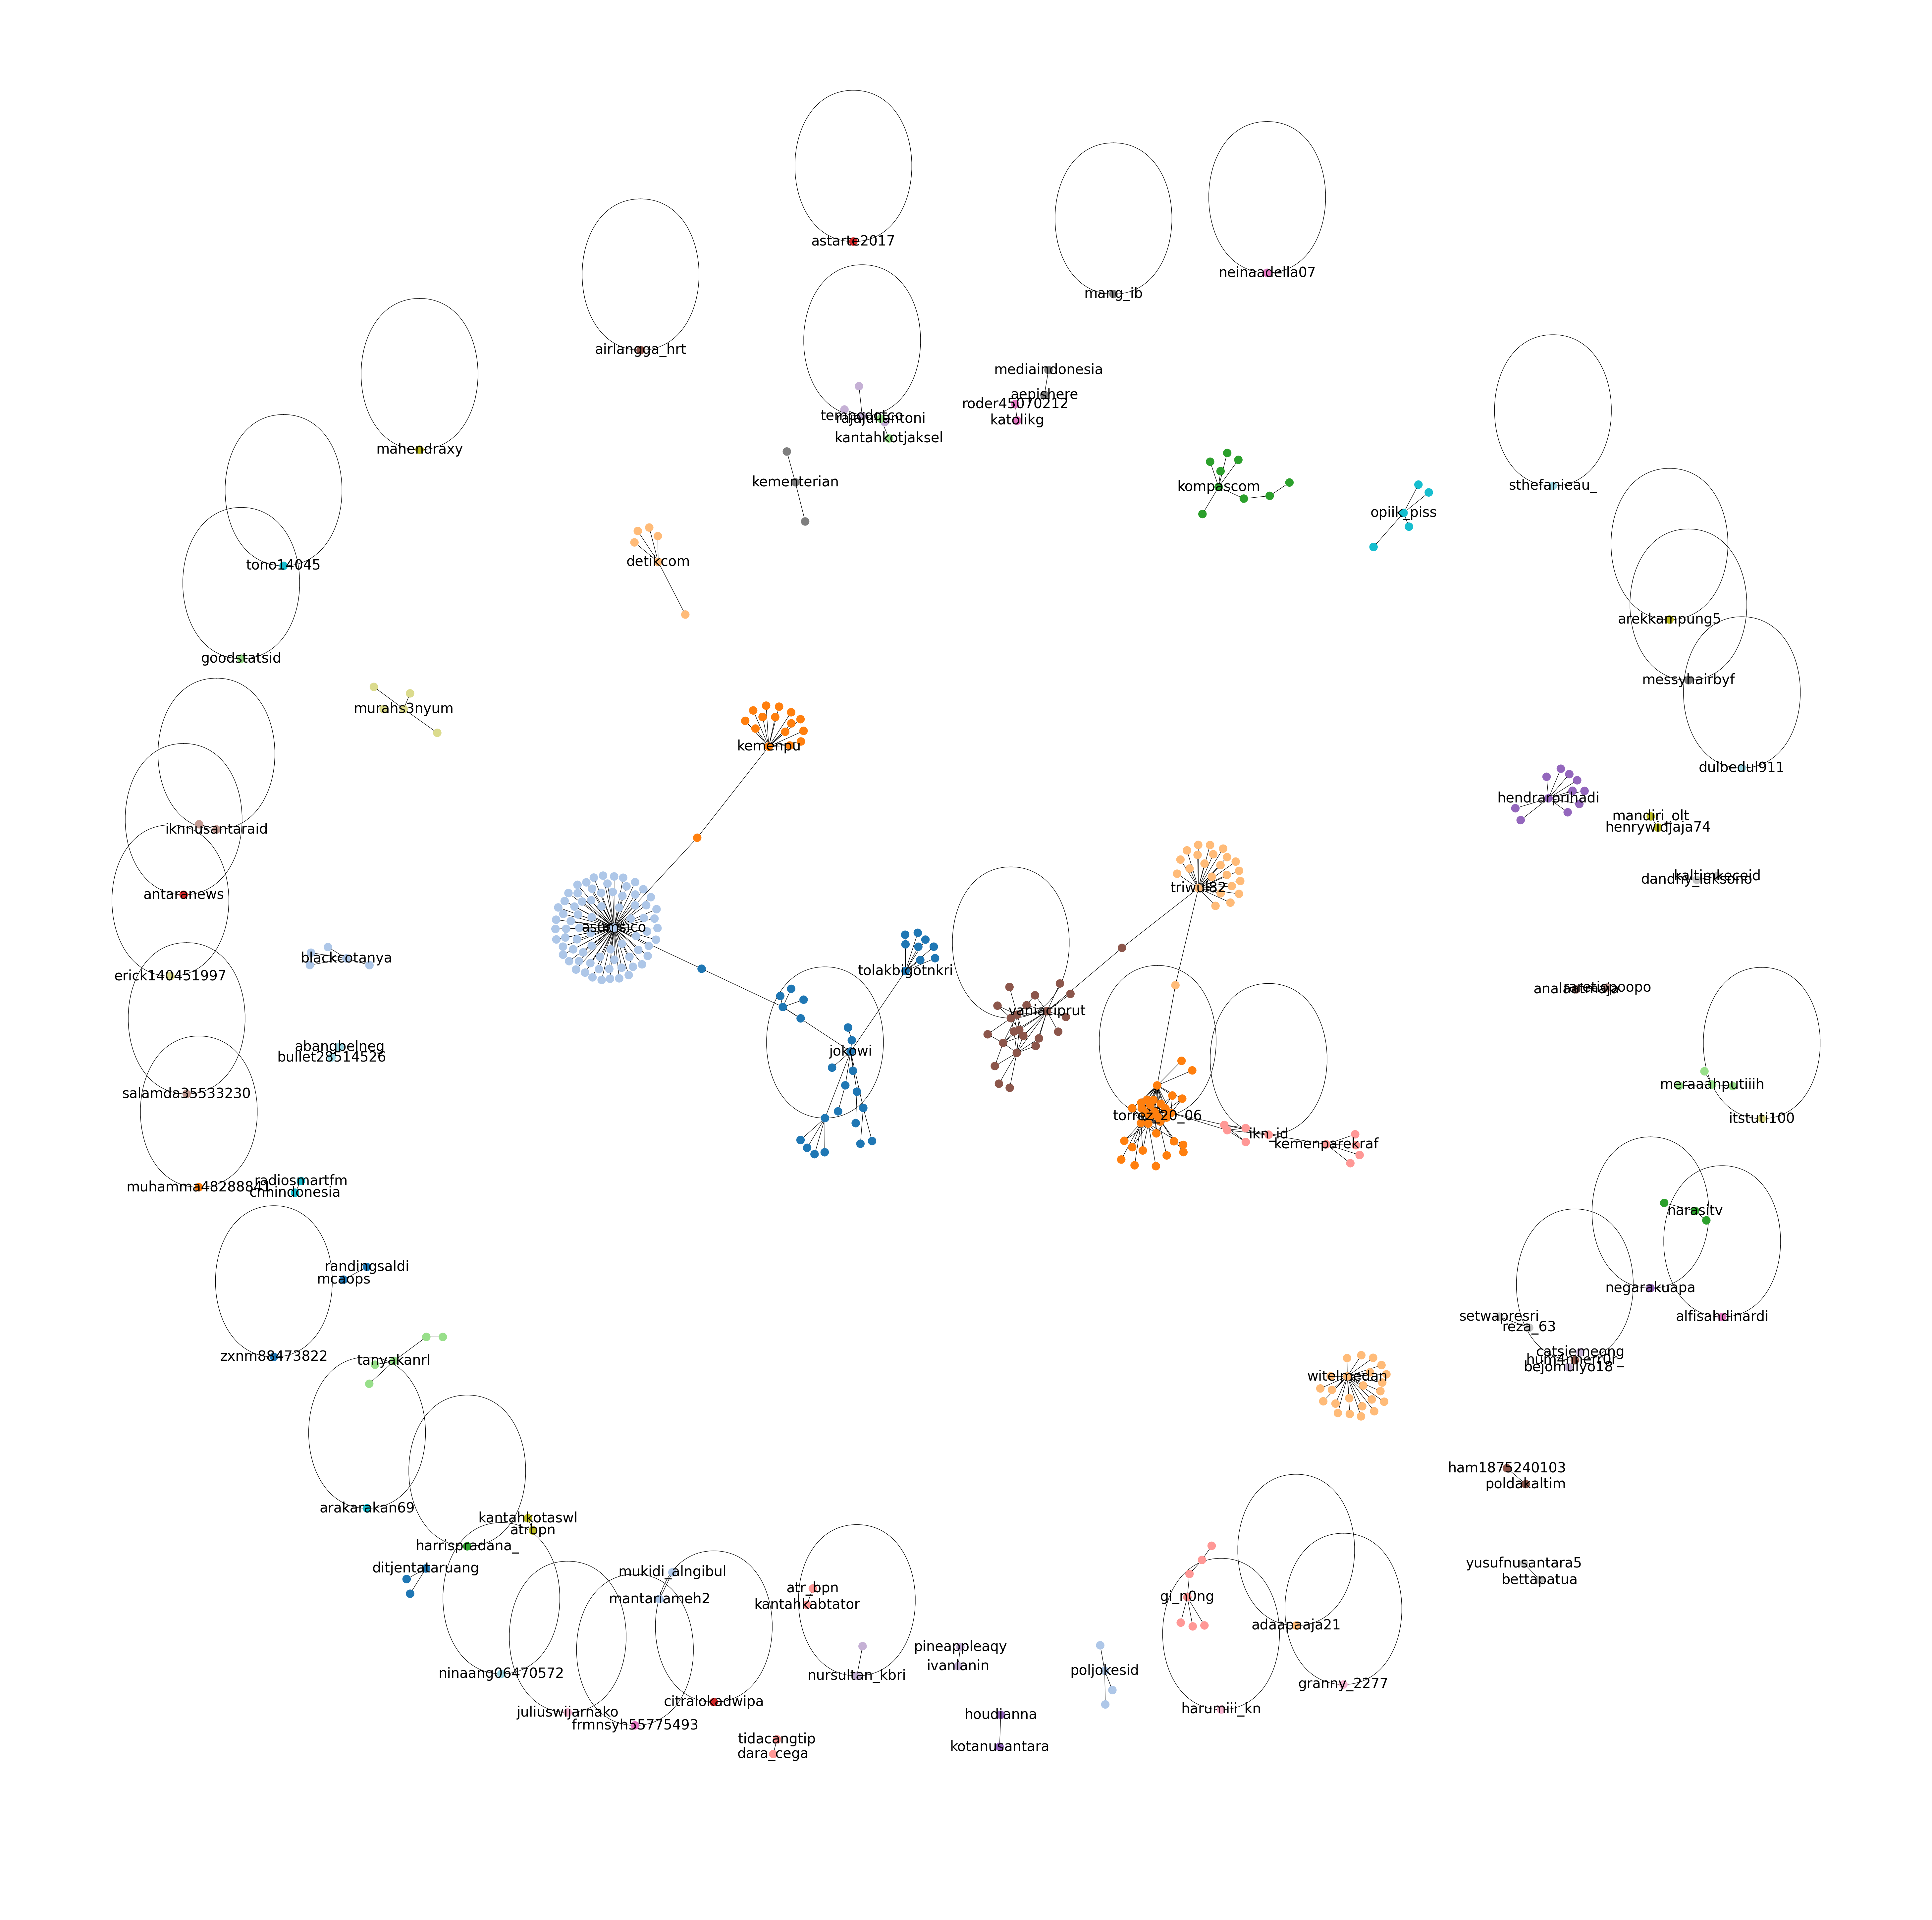

In [37]:
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Membaca data dari file CSV
data = pd.read_csv('net_IKN_Nusantara.csv')

# Mengambil kolom kedua dan ketiga
subset_data = data.iloc[:, [1, 2]]

# Membuat graf dari subset data
G = nx.from_pandas_edgelist(subset_data, source='from', target='to')

# Menjalankan algoritma Louvain
partition = community.best_partition(G)

# Mengatur posisi node pada graf
pos = nx.spring_layout(G)

# Mengambil jumlah komunitas
num_communities = max(partition.values()) + 1

# Membuat colormap dengan jumlah warna sesuai jumlah komunitas
cmap = cm.get_cmap('tab20', num_communities)

# Menentukan ukuran canvas
fig, ax = plt.subplots(figsize=(75, 75))

# Menggambar node pada graf dengan warna sesuai komunitas
node_colors = [cmap(partition[node]) for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, ax=ax)

# Menggambar edge pada graf
nx.draw_networkx_edges(G, pos, ax=ax)

# Menampilkan label node dengan font size berdasarkan jumlah degree tertinggi di setiap komunitas
for community_id in set(partition.values()):
    community_nodes = [node for node, c_id in partition.items() if c_id == community_id]
    subgraph = G.subgraph(community_nodes)
    node_degrees = dict(subgraph.degree())
    max_degree = max(node_degrees.values())
    labels = {node: node if degree == max_degree else '' for node, degree in node_degrees.items()}
    font_size = (10 + 5 * (max_degree / max(node_degrees.values())))*2
    nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=font_size, ax=ax)

# Menampilkan hasil visualisasi
plt.axis('off')
plt.show()
